File is at:  C:\Users\hanr\GitHub\SGMPy\data/sample_with_carbon.dat
Start opening c-scans.
Opened  60  c-scans.

estimate energy range:  270 - 320
estimate roi:  21 - 37
default bin interval: 0.1
('Start plotting summary plot of', 'TEY', '...')
Plot generating complete


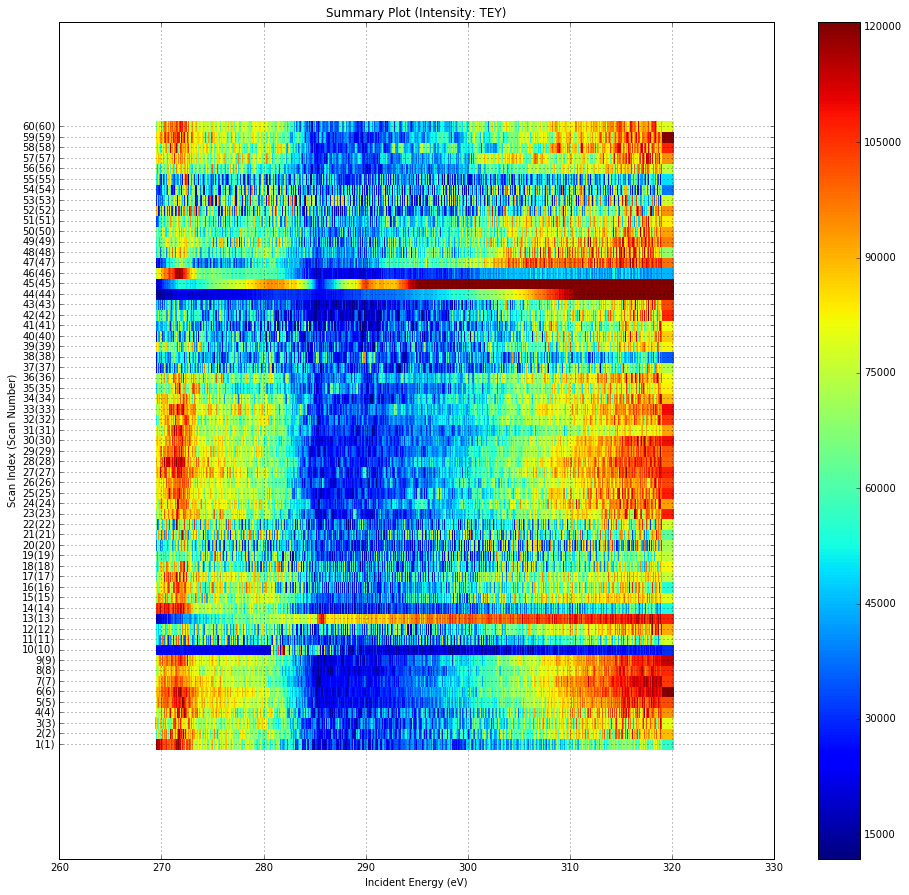

('Start plotting summary plot of', 'SDD3', '...')
Plot generating complete


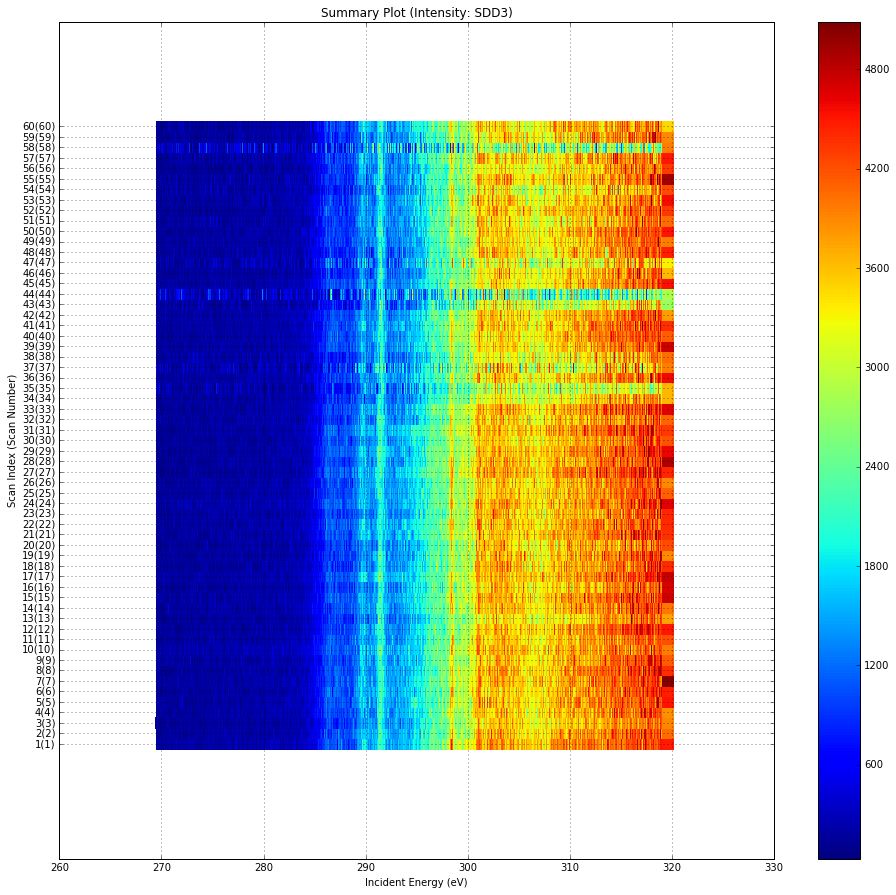

In [1]:
%matplotlib inline
from scripts.open_spec import *
from scripts.widget import *
from scripts.xas_tool import *

file_directory = get_abs_path("data/sample_with_carbon.dat")

opened_xas_data = OpenMultiCScan()
xas_process_para= opened_xas_data.open_all_xas(file_directory)

# xas_process_para = XASProcessPara(energy_start = 270, energy_end = 320, roi_start = 10, roi_end = 40, bin_interval = 0.1)

summary_plot(opened_xas_data, "TEY")
summary_plot(opened_xas_data, "PFY_SDD3", xas_process_para)

In [2]:
input_bad_scan = text_field()

43, 44, 46, 47, 48, 49, 51


removed 43 , real scan number is 43
removed 44 , real scan number is 44
removed 46 , real scan number is 46
removed 47 , real scan number is 47
removed 48 , real scan number is 48
removed 49 , real scan number is 49
removed 51 , real scan number is 51

numb_of_bins after calculation 500
Total good scan numbers: 53
Start creating bins
Energy range is:  270 - 320
created bins completed.

Start assigning data points into bins
Assign data points completed

Start calcualting average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 498 . Average calculation is not necessary
No data point is in Bin No. 499 . Average calculation is not necessary
No data point is in Bin No. 500 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 498 . Average calculation is not necessary
No data point is in Bin No. 499 . Average calculation is not necessary
No data point is in Bin No. 500 . Av

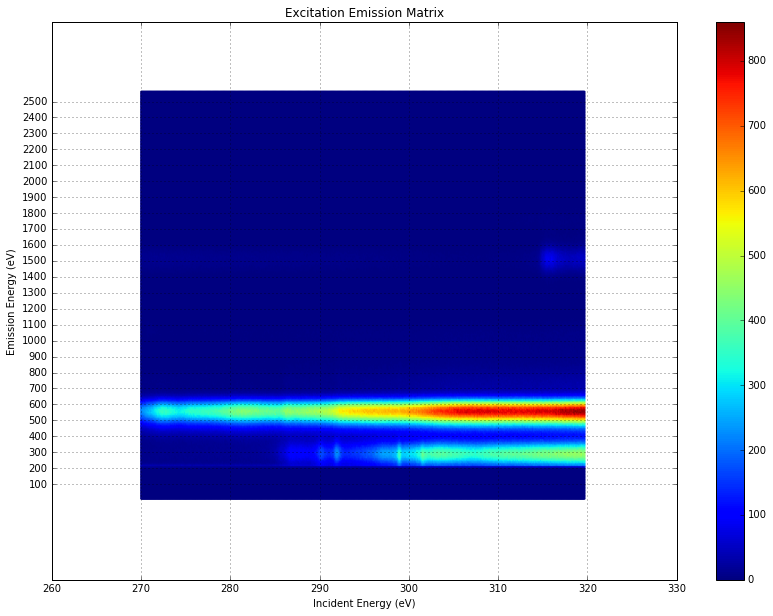

Incident Energy range: 270.05 - 319.65
Emission Energy range: 10.0 - 2560.0
Plotting average XAS.


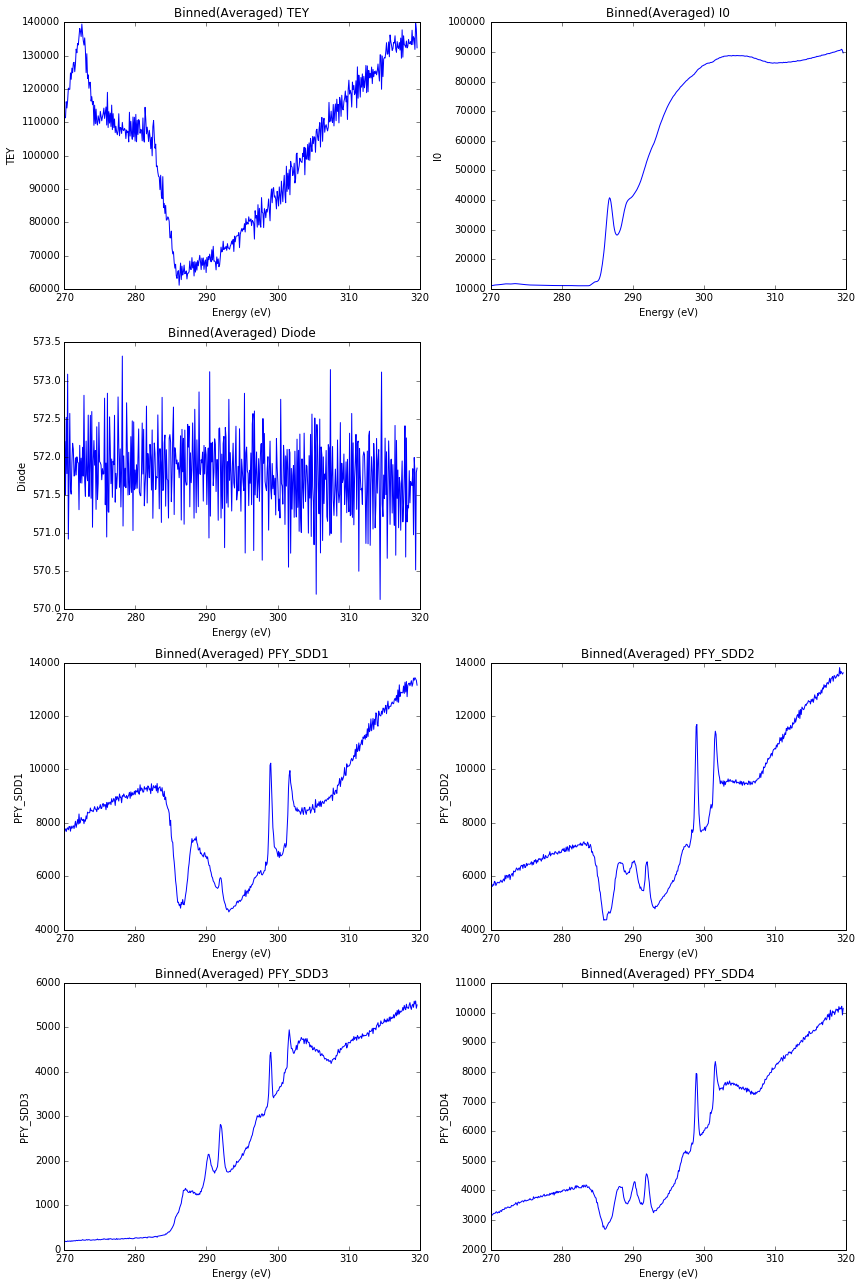

Export data complete
File is at:  C:\Users\hanr\GitHub\SGMPy\data/output_carbon_avg_all.xas


In [3]:
bad_scan = input_bad_scan.value
xas_process_data = XASProcess("multi")
good_scan_index = xas_process_data.generate_good_scan_index(opened_xas_data, bad_scan)

xas_process_data.process_xas(good_scan_index, opened_xas_data, xas_process_para)
xas_process_data.plot_excitation_emission_matrix("SDD3")
xas_process_data.plot_avg_xas_all()
# xas_process_data.plot_avg_xas("PFY_SDD3")

export_data = ExportData(xas_process_data)
export_data.export_all("data/output_carbon_avg_all.xas")
# export_data.export_solo("data/output_pfy_sdd3.xas", "PFY_SDD3")

File is at:  C:\Users\hanr\GitHub\SGMPy\data/blank_scans.dat
Start opening c-scans.
Opened  60  c-scans.

estimate energy range:  270 - 320
estimate roi:  21 - 37
default bin interval: 0.1
('Start plotting summary plot of', 'TEY', '...')
Plot generating complete


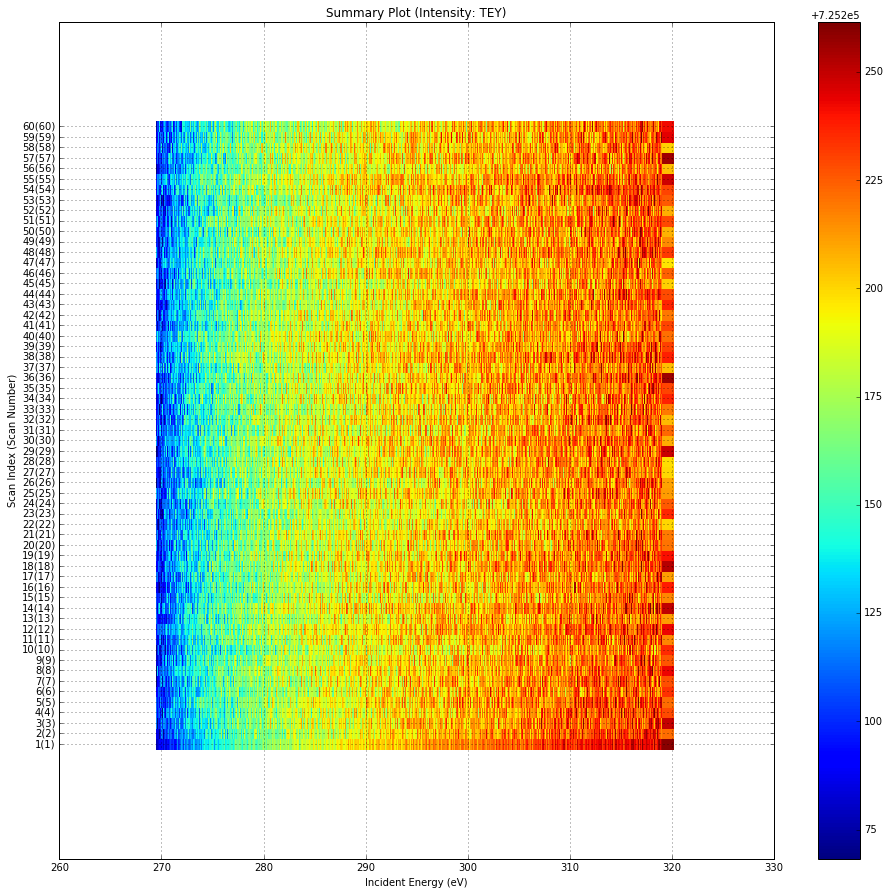

('Start plotting summary plot of', 'SDD1', '...')
Plot generating complete


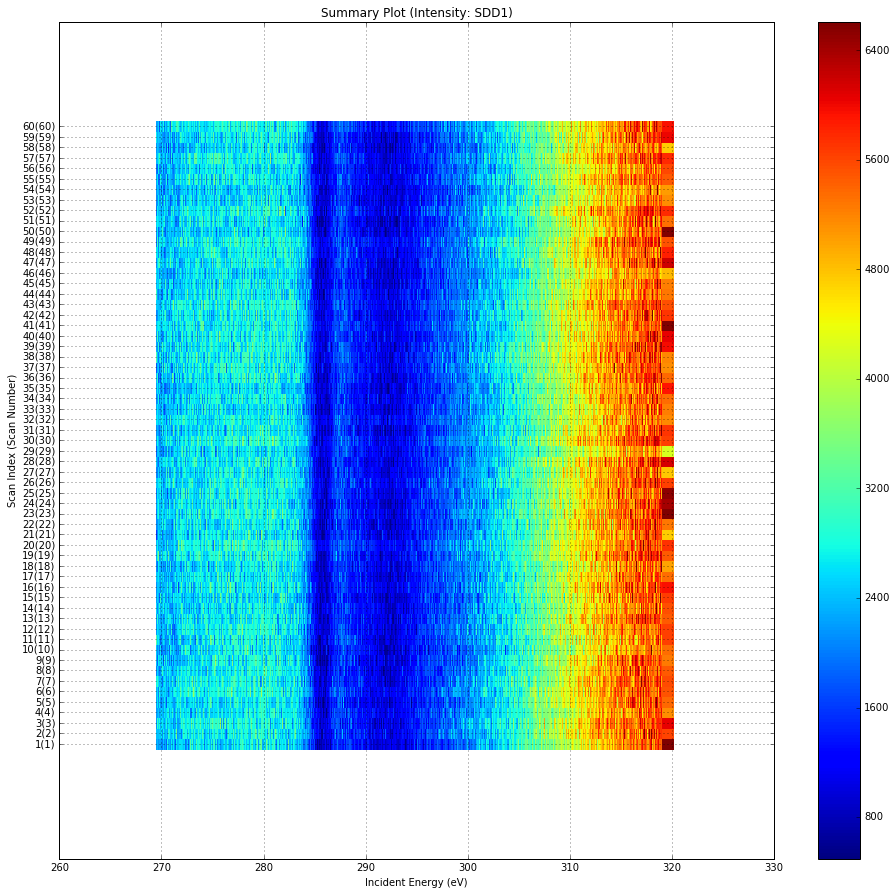

In [4]:
file_directory_2 = get_abs_path("data/blank_scans.dat")

opened_blank_xas_data = OpenMultiCScan()
opened_blank_xas_data.open_all_xas(file_directory_2)

summary_plot(opened_blank_xas_data, "TEY")
summary_plot(opened_blank_xas_data, "PFY_SDD1", xas_process_para)

In [5]:
input_blank_bad_scan = text_field()

29


removed 29 , real scan number is 29

numb_of_bins after calculation 500
Total good scan numbers: 59
Start creating bins
Energy range is:  270 - 320
created bins completed.

Start assigning data points into bins
Assign data points completed

Start calcualting average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 498 . Average calculation is not necessary
No data point is in Bin No. 499 . Average calculation is not necessary
No data point is in Bin No. 500 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 498 . Average calculation is not necessary
No data point is in Bin No. 499 . Average calculation is not necessary
No data point is in Bin No. 500 . Average calculation is not necessary
Calculation completed.

--- 14.5070002079 seconds ---
Plotting average XAS.


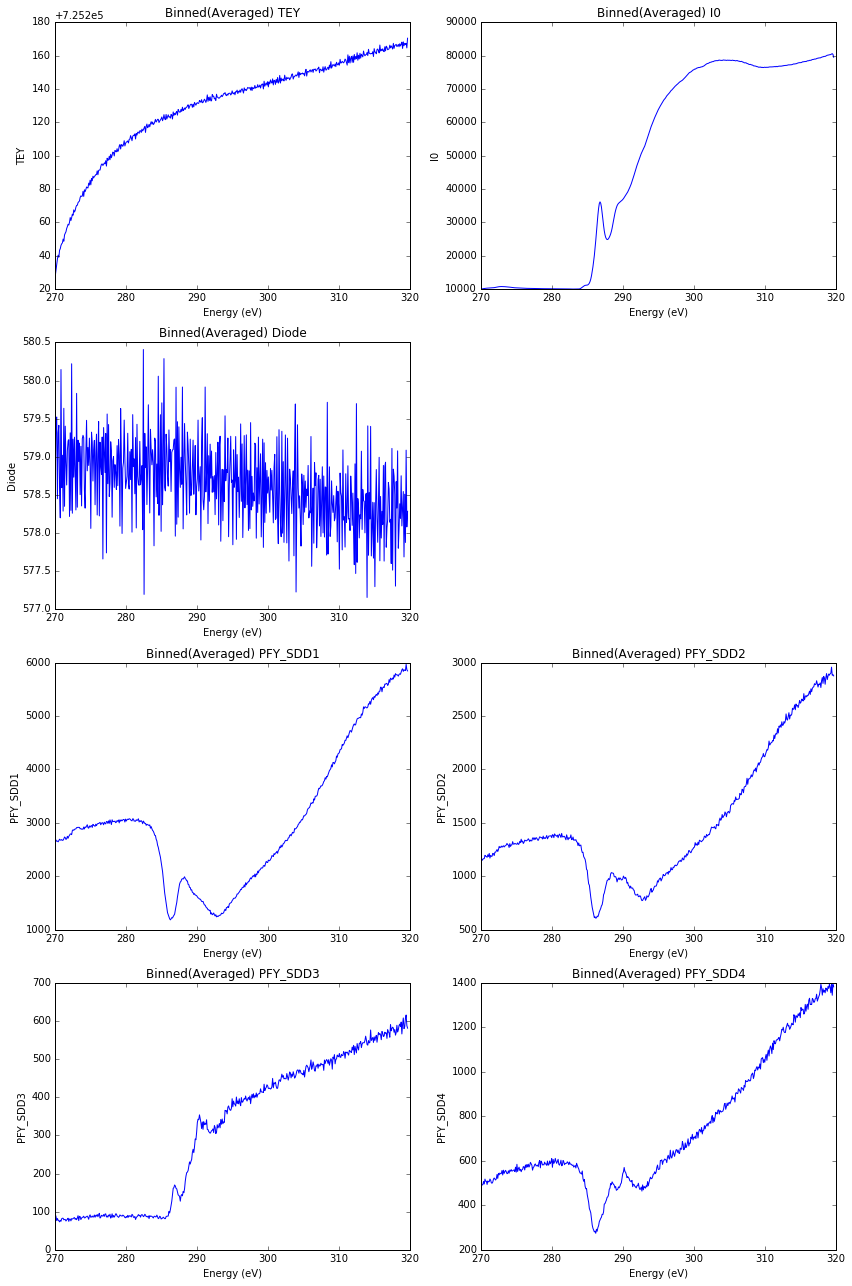

In [6]:
blank_bad_scan = input_blank_bad_scan.value
blank_xas_process_data = XASProcess("multi")
blank_good_scan_index = blank_xas_process_data.generate_good_scan_index(opened_blank_xas_data, blank_bad_scan)

blank_xas_process_data.process_xas(blank_good_scan_index, opened_blank_xas_data, xas_process_para)
blank_xas_process_data.plot_avg_xas_all()

<IPython.core.display.Javascript object>


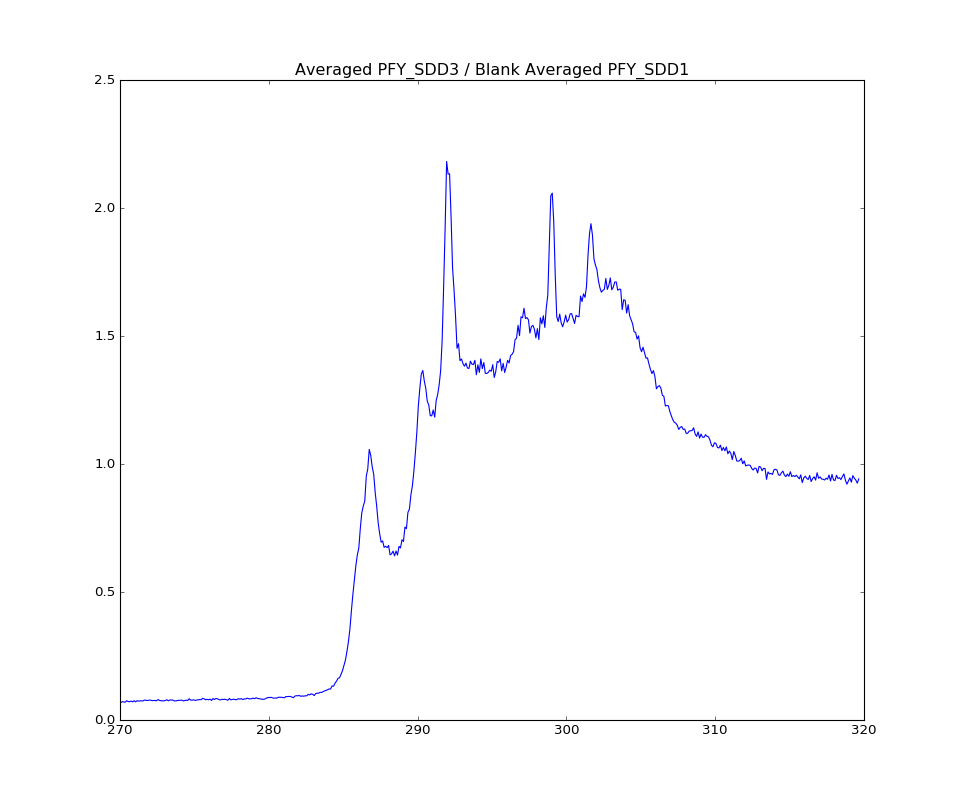

Export data complete.
File is at:  C:\Users\hanr\GitHub\SGMPy\data/output_carbon_normalized.xas


In [11]:
%matplotlib notebook
xas_process_carbon = XASProcessCarbon(xas_process_data, blank_xas_process_data)
xas_process_carbon.carbon_normalize("PFY_SDD3", "PFY_SDD1")

# todo: please change the export path of the file
export_data.export_normalized_data("data/output_carbon_normalized.xas", 
                       xas_process_data.get_mean_energy_array(), "Energy",
                       blank_xas_process_data.get_mean_energy_array(), "PFY_SDD3/Blank_I0")